***Alumnos***

Franco Nicolas Müller - DNI 40555901

Julian Ignacio Göttig - DNI 40365290

**Trabajo Practico N° 2 - Programación II - Analisis de Datos**

Importación de las librerías y carga del CSV:

---



In [2]:
import pandas as pd
from google.colab import files
# Selecciona el archivo CSV desde tu sistema local
uploaded = files.upload()

#Elegir archivo en la PC descargada

Saving servicio_meteorológico.csv to servicio_meteorológico.csv


In [3]:
# Lectura del archivo
file_name = list(uploaded.keys())[0]
df = pd.read_csv("servicio_meteorológico.csv", encoding='latin1' )


Limpieza de Datos:

---



In [120]:
#Limpieza de datos

df_con_datos = df.loc[~(df == 'S/D').any(axis=1)]   #Elimino los datos S/D
df_con_datos.columns.values[0] = "Estacion"  #Corrección de Titulo
df_con_datos = df_con_datos.dropna()  #Elimino los Nan

#Indico cantidad de filas sin información excluidas del analisís
print(str(len(df) - len(df_con_datos)) + " Filas de " + str(len(df)) + " fueron excluidas del analisis por tener algun campo sin información, es decir el " + str(round((len(df) - len(df_con_datos))/len(df)*100)) + " %")

reemplazo_tildes = {
    'Temperatura mxima (grados C)': 'Temperatura Maxima (grados C)',
    'Temperatura mnima (grados C)': 'Temperatura minima (grados C)',
    'Precipitacin (mm)': 'Precipitacion (mm)',
    'Frecuencia de das con Precipitacin superior a 0.1 mm': 'Frecuencia de dias con Precipitacion superior a 0.1 mm'
}

df_con_datos['Valor Medio de'] = df_con_datos['Valor Medio de'].replace(reemplazo_tildes)

columnas_mes = ["Ene", "Feb", "Mar" ,"Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
df_con_datos[columnas_mes] = df_con_datos[columnas_mes].apply(pd.to_numeric, errors='coerce')


39 Filas de 592 fueron excluidas del analisis por tener algun campo sin información, es decir el 7 %


Segmentación y Analisis variables claves:

---



La temperatura a lo largo del país, tuvo los siguientes movimientos para todo el año: 

     Media  Mediana  Desviacion
Ene  21.66     23.7        6.79
Feb  20.49     22.3        6.81
Mar  18.51     20.5        7.22
Abr  14.59     16.5        7.17
May  11.01     12.7        6.80
Jun   8.18      9.9        6.71
Jul   7.53      8.9        6.80
Ago   9.61     10.7        7.14
Sep  11.99     13.6        7.10
Oct  15.59     17.4        7.38
Nov  18.34     20.1        6.93
Dic  20.69     22.5        6.79


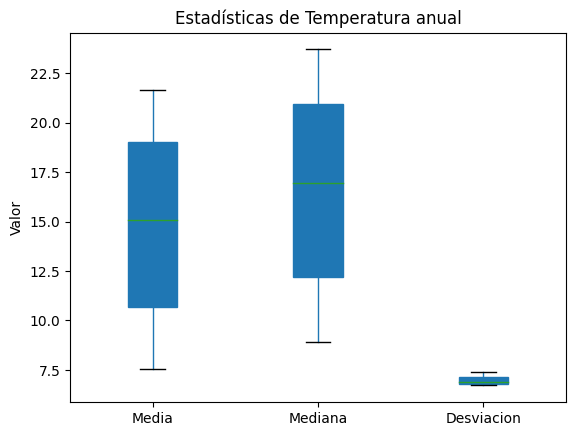


Nuestra Moda a lo largo del año, se mantuvo cerca de los 15° teniendo en cuenta todas las estaciones del País
Mientras que por el lado de nuestra Mediana, fue un poco mas alta, rosando los 17° en niveles generales
Teniendo picos superiores a 23° y minimos inferiores a 9°
En cuanto a los Desvios, se mantuvieron en el rango de 6 y 9 grados





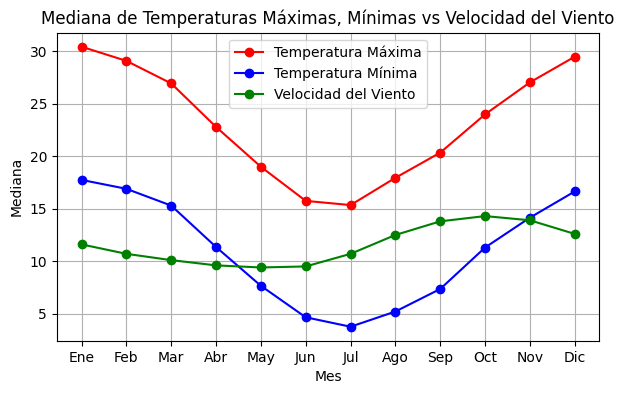


Como podemos ver, al comparar las temperaturas maximas y minimas a lo largo del año respetan el mismo movimiento
Ademas, dejamos demostrado que el viento no es un factor clave en el aumento o disminución de las temperaturas
Ya que su curva, no respeta los mismos movimientos que los máximos y mínimos
 
 
 



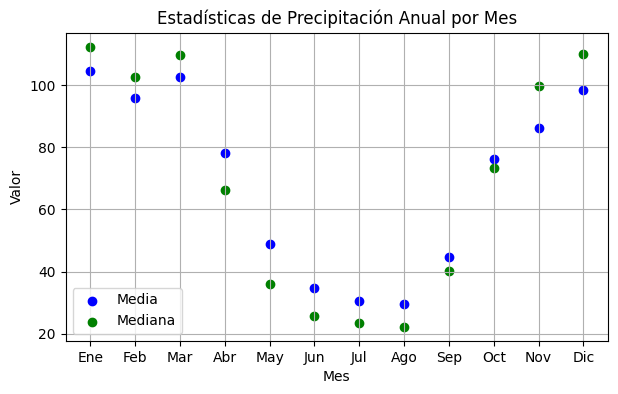


La precipitación, como podemos ver, sigue el mismo rumbo que nuestras temperaturas
En los meses de mas calor, la misma aumenta considerablemente, mientras que en meses de Humedad, la Media y Moda de estas es muy inferior
Con lo cual, podemos interpretar que producto de los fuertes calores, nacen las lluvias





In [139]:
#Analisis de datos:

import matplotlib.pyplot as plt
import calendar

#Segmentación por categorías
df_temperatura = df_con_datos[df_con_datos['Valor Medio de'] == 'Temperatura (grados C)']
df_temperatura_maxima = df_con_datos[df_con_datos['Valor Medio de'] == 'Temperatura Maxima (grados C)']
df_temperatura_minima = df_con_datos[df_con_datos['Valor Medio de'] == 'Temperatura minima (grados C)']
df_humedad = df_con_datos[df_con_datos['Valor Medio de'] == 'Humedad relativa (%)']
df_velocidad_viento = df_con_datos[df_con_datos['Valor Medio de'] == 'Velocidad del Viento (km/h)']
df_nubosidad = df_con_datos[df_con_datos['Valor Medio de'] == 'Nubosidad total (octavos)']
df_precipitacion = df_con_datos[df_con_datos['Valor Medio de'] == 'Precipitacion (mm)']
df_precipitacion_superior = df_con_datos[df_con_datos['Valor Medio de'] == 'Frecuencia de dias con Precipitacion superior a 0.1 mm']

#TEMPERATURAS
#Calculo Temperatura Media/Mediana y Var
resumen_temperatura = pd.DataFrame({
    #'Mes': columnas_mes,
    'Media': round(df_temperatura[columnas_mes].mean(),2),
    'Mediana': round(df_temperatura[columnas_mes].median(),2),
    'Desviacion': round(df_temperatura[columnas_mes].std(),2)
})

print("La temperatura a lo largo del país, tuvo los siguientes movimientos para todo el año: ")
print("")
print(resumen_temperatura)

resumen_temperatura.boxplot(grid=False, vert=True, patch_artist=True)
plt.title('Estadísticas de Temperatura anual')
plt.ylabel('Valor')
plt.show()

#Resumen grafico Maximos Minimos y Viento
print("")
print("Nuestra Moda a lo largo del año, se mantuvo cerca de los 15° teniendo en cuenta todas las estaciones del País")
print("Mientras que por el lado de nuestra Mediana, fue un poco mas alta, rosando los 17° en niveles generales")
print("Teniendo picos superiores a 23° y minimos inferiores a 9°")
print("En cuanto a los Desvios, se mantuvieron en el rango de 6 y 9 grados")
print("")
print("")
print("")

#MAXIMOS MINIMOS Y VIENTOS:
# Crear DataFrames con las medianas de temperaturas máximas y mínimas ademas del viento
resumen_temperatura_maxima = pd.DataFrame({'Mediana Maxima': round(df_temperatura_maxima[columnas_mes].median(), 2)})
resumen_temperatura_minima = pd.DataFrame({'Mediana Minima': round(df_temperatura_minima[columnas_mes].median(), 2)})
resumen_velocidad_viento = pd.DataFrame({'Mediana Viento': round(df_velocidad_viento[columnas_mes].median(), 2)})

# Obtener orden de los meses en español
orden_meses_espanol = [calendar.month_name[i] for i in range(1, 13)]
meses_espanol = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Gráfico de líneas con la mediana de temperaturas máximas, mínimas y velocidad del viento por mes
plt.figure(figsize=(7, 4))
plt.plot(meses_espanol, resumen_temperatura_maxima['Mediana Maxima'], marker='o', linestyle='-', color='red', label='Temperatura Máxima')
plt.plot(meses_espanol, resumen_temperatura_minima['Mediana Minima'], marker='o', linestyle='-', color='blue', label='Temperatura Mínima')
plt.plot(meses_espanol, resumen_velocidad_viento['Mediana Viento'], marker='o', linestyle='-', color='green', label='Velocidad del Viento')
plt.title('Mediana de Temperaturas Máximas, Mínimas vs Velocidad del Viento')
plt.xlabel('Mes')
plt.ylabel('Mediana')
plt.legend()
plt.grid(True)
plt.show()

#Resumen grafico Maximos Minimos y Viento
print("")
print("Como podemos ver, al comparar las temperaturas maximas y minimas a lo largo del año respetan el mismo movimiento")
print("Ademas, dejamos demostrado que el viento no es un factor clave en el aumento o disminución de las temperaturas")
print("Ya que su curva, no respeta los mismos movimientos que los máximos y mínimos")

print(" ")
print(" ")
print(" ")

#PRECIPITACIÓN
resumen_precipitacion = pd.DataFrame({
    'Media': round(df_precipitacion[columnas_mes].mean(), 2),
    'Mediana': round(df_precipitacion[columnas_mes].median(), 2),
    'Desviacion': round(df_precipitacion[columnas_mes].std(), 2)
})

# Crear gráfico de puntos para la media y mediana de la precipitación por mes
plt.figure(figsize=(7, 4))
plt.scatter(meses_espanol, resumen_precipitacion['Media'], color='blue', label='Media')
plt.scatter(meses_espanol, resumen_precipitacion['Mediana'], color='green', label='Mediana')
plt.title('Estadísticas de Precipitación Anual por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
print("")
plt.show()

print("")
print("La precipitación, como podemos ver, sigue el mismo rumbo que nuestras temperaturas")
print("En los meses de mas calor, la misma aumenta considerablemente, mientras que en meses de Humedad, la Media y Moda de estas es muy inferior")
print("Con lo cual, podemos interpretar que producto de los fuertes calores, nacen las lluvias")

print("")
print("")
print("")




Preguntas de Investigación:

1) ¿Cual fue el mes mas lluvioso a lo largo del año en todo el país?

2) ¿Cual es la temperatura promedio entre Enero y Febrero en la estación "ESQUEL AERO"?

3) ¿Cual fue la rafaga de viento mas alta que se registró en el mes de Julio?

---



In [141]:
#1) Mes mas lluvioso
mes_mas_lluvioso = df_precipitacion[columnas_mes].sum().idxmax()

print("El mes más lluvioso a lo largo del año en todo el país fue "+ mes_mas_lluvioso)
print("Como vemos, esto revalida nuestro grafico de puntos anterior, donde indicaba una media mas alta para los meses de Enero en cuanto a Precipitaciones")
#2) Temp Promedio ESQUEL AERO - Enero Febrero:

df_estacion_san_martin = df_temperatura[df_temperatura['Estacion'] == 'ESQUEL AERO']

columnas_enero_febrero = ['Ene', 'Feb']
temperatura_promedio_enero_febrero = df_estacion_san_martin[columnas_enero_febrero].mean().mean()

print("")
print("La temperatura promedio entre Enero y Febrero en la estación 'ESQUEL AERO' es: "+ str(temperatura_promedio_enero_febrero) + " grados Celsius")

# 3) RAFAGA DE VIENTO:
fila_maxima_julio = df_velocidad_viento.loc[df_velocidad_viento['Jul'].idxmax()] #Busco Fila para luego buscar Estación

maxima_rafaga_julio = fila_maxima_julio['Jul']
estacion_maxima_julio = fila_maxima_julio['Estacion']
dia_maxima_julio = fila_maxima_julio.name

print("")
print("La ráfaga de viento máxima en el mes de julio fue de: " + str(maxima_rafaga_julio) + " km/h.")
print("Se registró en la estación " + str(estacion_maxima_julio) + ".")


El mes más lluvioso a lo largo del año en todo el país fue Ene
Como vemos, esto revalida nuestro grafico de puntos anterior, donde indicaba una media mas alta para los meses de Enero en cuanto a Precipitaciones

La temperatura promedio entre Enero y Febrero en la estación 'ESQUEL AERO' es: 15.05 grados Celsius

La ráfaga de viento máxima en el mes de julio fue de: 34.5 km/h.
Se registró en la estación BASE MARAMBIO.
